In [64]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [65]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [316]:
i1 = 0.05
i2 = 0.1

w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = .4
w6 = .45
w7 = .5
w8 = .55

b1 = 0.35
b2 = 0.6

total_errors = []


In [382]:
# forward pass

print(f'w1: {w1:.4f}')

net_h1 = i1 * w1 + i2 * w2 + b1
net_h2 = i1 * w3 + i2 * w4 + b1

out_h1 = sigmoid((net_h1))
out_h2 = sigmoid((net_h2))

net_o1 = out_h1 * w5 + out_h2 * w6 + b2
net_o2 = out_h1 * w7 + out_h2 * w8 + b2

out_o1 = sigmoid((net_o1))
out_o2 = sigmoid((net_o2))

target1 = 0.01
target2 = 0.99

e1 = 0.5 * (target1 - out_o1)**2    # MSE
e2 = 0.5 * (target2 - out_o2)**2

e = e1 + e2
total_errors.append(e)
print(f'total error: {e}')


w1: 6.8274
total error: 0.005050609308465384


In [362]:
# backward pass

# Calculate partial_e_wrt_w1
partial_net_h1_wrt_w1 = i1
partial_out_h1_wrt_net_h1 = out_h1 * (1 - out_h1)
partial_net_o1_wrt_out_h1 = w5
partial_out_o1_wrt_net_o1 = out_o1 * (1 - out_o1)
partial_e1_wrt_out_o1 = -(target1 - out_o1)
partial_e1_wrt_out_h1 = partial_net_o1_wrt_out_h1 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
partial_net_o2_wrt_out_h1 = w6
partial_out_o2_wrt_net_o2 = out_o2 * (1 - out_o2)
partial_e2_wrt_out_o2 = -(target2 - out_o2)
partial_e2_wrt_out_h1 = partial_net_o2_wrt_out_h1 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
partial_e_wrt_out_h1 = partial_e1_wrt_out_h1 + partial_e2_wrt_out_h1
partial_e_wrt_w1 = partial_net_h1_wrt_w1 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

# Calculate partial_e_wrt_w2
partial_net_h2_wrt_w2 = i1
partial_out_h2_wrt_net_h2 = out_h2 * (1 - out_h2)
partial_net_o1_wrt_out_h2 = w7
partial_e1_wrt_out_h2 = partial_net_o1_wrt_out_h2 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
partial_net_o2_wrt_out_h2 = w8
partial_e2_wrt_out_h2 = partial_net_o2_wrt_out_h2 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
partial_e_wrt_out_h2 = partial_e1_wrt_out_h2 + partial_e2_wrt_out_h2
partial_e_wrt_w2 = partial_net_h2_wrt_w2 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

# Calculate partial_e_wrt_w3
partial_net_h1_wrt_w3 = i2
partial_e_wrt_w3 = partial_net_h1_wrt_w3 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

# Calculate partial e wrt w4
partial_net_h2_wrt_w4 = i2
partial_e_wrt_w4 = partial_net_h2_wrt_w4 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

# Calculate partial e wrt w5
partial_net_o1_wrt_w5 = out_h1
partial_e_wrt_out_o1 = -(target1 - out_o1)
partial_e_wrt_w5 = partial_net_o1_wrt_w5 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

# Calculate partial e wrt w6
partial_net_o2_wrt_w6 = out_h1
partial_e_wrt_out_o2 = -(target2 - out_o2)
partial_e_wrt_w6 = partial_net_o2_wrt_w6 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

# Calculate partial e wrt w7
partial_net_o1_wrt_w7 = out_h2
partial_e_wrt_w7 = partial_net_o1_wrt_w7 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

# Calculate partial e wrt w8
partial_net_o2_wrt_w8 = out_h2
partial_e_wrt_w8 = partial_net_o2_wrt_w8 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

# Calculate partial e wrt b1
partial_net_h1_wrt_b1 = 1
partial_net_h2_wrt_b1 = 1
partial_e1_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e1_wrt_out_h1 * partial_e1_wrt_out_h2
partial_e2_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e2_wrt_out_h1 * partial_e2_wrt_out_h2
partial_e_wrt_b1 = partial_e1_wrt_b1 + partial_e2_wrt_b1

# # Calculate partial e wrt b2
partial_net_o1_wrt_b2 = 1
partial_net_o2_wrt_b2 = 1
partial_e1_wrt_b2 = partial_net_o1_wrt_b2 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
partial_e2_wrt_b2 = partial_net_o2_wrt_b2 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
partial_e_wrt_b2 = partial_e1_wrt_b2 + partial_e2_wrt_b2



print(f'partial_e_wrt_w1: {partial_e_wrt_w1}')
print(f'partial_e_wrt_w2: {partial_e_wrt_w2}')
print(f'partial_e_wrt_w3: {partial_e_wrt_w3}')
print(f'partial_e_wrt_w4: {partial_e_wrt_w4}')
print(f'partial_e_wrt_w5: {partial_e_wrt_w5}')
print(f'partial_e_wrt_w6: {partial_e_wrt_w6}')
print(f'partial_e_wrt_w7: {partial_e_wrt_w7}')
print(f'partial_e_wrt_w8: {partial_e_wrt_w8}')
print(f'partial_e_wrt_b1: {partial_e_wrt_b1}')


partial_e_wrt_w1: -0.0024337858329955752
partial_e_wrt_w2: -0.002421528072197803
partial_e_wrt_w3: -0.0048675716659911505
partial_e_wrt_w4: -0.004843056144395606
partial_e_wrt_w5: 0.0749622889393446
partial_e_wrt_w6: -0.06523001811341587
partial_e_wrt_w7: 0.07546811606002125
partial_e_wrt_w8: -0.06567017426007107
partial_e_wrt_b1: 0.001230800863484938


In [363]:
# Let's update w5 and recalculate the total error
LR = .5

w1 = w1 - LR * partial_e_wrt_w1
w2 = w2 - LR * partial_e_wrt_w2
w3 = w3 - LR * partial_e_wrt_w3
w4 = w4 - LR * partial_e_wrt_w4
w5 = w5 - LR * partial_e_wrt_w5
w6 = w6 - LR * partial_e_wrt_w6
w7 = w7 - LR * partial_e_wrt_w7
w8 = w8 - LR * partial_e_wrt_w8
b1 = b1 - LR * partial_e_wrt_b1
b2 = b2 - LR * partial_e_wrt_b2

total errors: [0.2983711087600027, 0.2983711087600027, 0.28496035867593683, 0.2726011440831605, 0.2617516424126404, 0.25268043884836444, 0.24543478273454108, 0.23987521724283556, 0.23574927366456544, 0.23276687023691386, 0.23065379795643703, 0.22917869973032406, 0.22816011801540448, 0.22746248731821322, 0.22698779916860745]


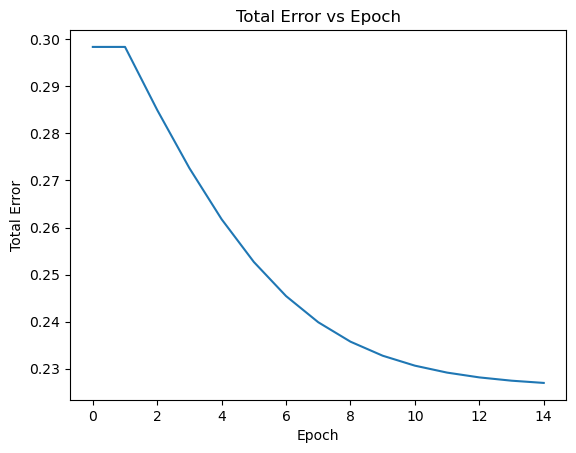

In [364]:
print(f'total errors: {total_errors}')

# Plot the total error
plt.plot(total_errors)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Total Error vs Epoch')
plt.show()


Epoch: 0 Error: 0.2984
Epoch: 1000 Error: 0.2357
Epoch: 2000 Error: 0.2301
Epoch: 3000 Error: 0.2159
Epoch: 4000 Error: 0.1453
Epoch: 5000 Error: 0.0051
Epoch: 6000 Error: 0.0010
Epoch: 7000 Error: 0.0005
Epoch: 8000 Error: 0.0003
Epoch: 9000 Error: 0.0002


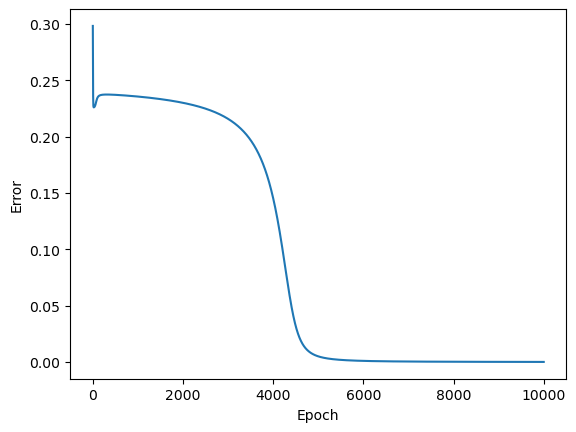

In [386]:
# Let's put it all together in a loop

num_epochs = 10000
i1 = 0.05
i2 = 0.1

w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = .4
w6 = .45
w7 = .5
w8 = .55

b1 = 0.35
b2 = 0.6

total_errors = []

for epoch in range(num_epochs):
    # forward pass

    net_h1 = i1 * w1 + i2 * w2 + b1
    net_h2 = i1 * w3 + i2 * w4 + b1

    out_h1 = sigmoid((net_h1))
    out_h2 = sigmoid((net_h2))

    net_o1 = out_h1 * w5 + out_h2 * w6 + b2
    net_o2 = out_h1 * w7 + out_h2 * w8 + b2

    out_o1 = sigmoid((net_o1))
    out_o2 = sigmoid((net_o2))

    target1 = 0.01
    target2 = 0.99

    e1 = 0.5 * (target1 - out_o1)**2    # MSE
    e2 = 0.5 * (target2 - out_o2)**2

    e = e1 + e2
    total_errors.append(e)

    

    # backward pass

    # Calculate partial_e_wrt_w1
    partial_net_h1_wrt_w1 = i1
    partial_out_h1_wrt_net_h1 = out_h1 * (1 - out_h1)
    partial_net_o1_wrt_out_h1 = w5
    partial_out_o1_wrt_net_o1 = out_o1 * (1 - out_o1)
    partial_e1_wrt_out_o1 = -(target1 - out_o1)
    partial_e1_wrt_out_h1 = partial_net_o1_wrt_out_h1 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
    partial_net_o2_wrt_out_h1 = w6
    partial_out_o2_wrt_net_o2 = out_o2 * (1 - out_o2)
    partial_e2_wrt_out_o2 = -(target2 - out_o2)
    partial_e2_wrt_out_h1 = partial_net_o2_wrt_out_h1 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
    partial_e_wrt_out_h1 = partial_e1_wrt_out_h1 + partial_e2_wrt_out_h1
    partial_e_wrt_w1 = partial_net_h1_wrt_w1 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

    # Calculate partial_e_wrt_w2
    partial_net_h2_wrt_w2 = i1
    partial_out_h2_wrt_net_h2 = out_h2 * (1 - out_h2)
    partial_net_o1_wrt_out_h2 = w7
    partial_e1_wrt_out_h2 = partial_net_o1_wrt_out_h2 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
    partial_net_o2_wrt_out_h2 = w8
    partial_e2_wrt_out_h2 = partial_net_o2_wrt_out_h2 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
    partial_e_wrt_out_h2 = partial_e1_wrt_out_h2 + partial_e2_wrt_out_h2
    partial_e_wrt_w2 = partial_net_h2_wrt_w2 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

    # Calculate partial_e_wrt_w3
    partial_net_h1_wrt_w3 = i2
    partial_e_wrt_w3 = partial_net_h1_wrt_w3 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

    # Calculate partial e wrt w4
    partial_net_h2_wrt_w4 = i2
    partial_e_wrt_w4 = partial_net_h2_wrt_w4 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

    # Calculate partial e wrt w5
    partial_net_o1_wrt_w5 = out_h1
    partial_e_wrt_out_o1 = -(target1 - out_o1)
    partial_e_wrt_w5 = partial_net_o1_wrt_w5 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

    # Calculate partial e wrt w6
    partial_net_o2_wrt_w6 = out_h1
    partial_e_wrt_out_o2 = -(target2 - out_o2)
    partial_e_wrt_w6 = partial_net_o2_wrt_w6 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

    # Calculate partial e wrt w7
    partial_net_o1_wrt_w7 = out_h2
    partial_e_wrt_w7 = partial_net_o1_wrt_w7 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

    # Calculate partial e wrt w8
    partial_net_o2_wrt_w8 = out_h2
    partial_e_wrt_w8 = partial_net_o2_wrt_w8 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

    # Calculate partial e wrt b1
    partial_net_h1_wrt_b1 = 1
    partial_net_h2_wrt_b1 = 1
    partial_e1_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e1_wrt_out_h1 * partial_e1_wrt_out_h2
    partial_e2_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e2_wrt_out_h1 * partial_e2_wrt_out_h2
    partial_e_wrt_b1 = partial_e1_wrt_b1 + partial_e2_wrt_b1

    # # Calculate partial e wrt b2
    partial_net_o1_wrt_b2 = 1
    partial_net_o2_wrt_b2 = 1
    partial_e1_wrt_b2 = partial_net_o1_wrt_b2 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
    partial_e2_wrt_b2 = partial_net_o2_wrt_b2 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
    partial_e_wrt_b2 = partial_e1_wrt_b2 + partial_e2_wrt_b2

    learning_rate = 1

    # Update weights and biases
    w1 -= learning_rate * partial_e_wrt_w1
    w2 -= learning_rate * partial_e_wrt_w2
    w3 -= learning_rate * partial_e_wrt_w3
    w4 -= learning_rate * partial_e_wrt_w4
    w5 -= learning_rate * partial_e_wrt_w5
    w6 -= learning_rate * partial_e_wrt_w6
    w7 -= learning_rate * partial_e_wrt_w7
    w8 -= learning_rate * partial_e_wrt_w8
    b1 -= learning_rate * partial_e_wrt_b1
    b2 -= learning_rate * partial_e_wrt_b2

    # Print out progress
    if epoch % 1000 == 0:
        print("Epoch: %d Error: %.4f" % (epoch, e))

    # if epoch == int(num_epochs * .2):
    #     learning_rate = learning_rate * .1

    # if epoch == int(num_epochs * .5):
    #     learning_rate = learning_rate * .1

# Plot the results
plt.plot(total_errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

